In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('/content/cardio_train.csv', delimiter=';')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Define initial parameters
total_population = len(df)
initial_infected = 10  # Assuming 10 individuals are initially affected by disparities or biases

In [5]:
# Define SIR model parameters
beta = 0.3  # Transmission rate
gamma = 0.1  # Recovery rate

In [6]:
# Initialize compartments
S = total_population - initial_infected
I = initial_infected
R = 0


In [7]:
# Lists to store simulation results
susceptible_list = [S]
infected_list = [I]
recovered_list = [R]

In [8]:
# Simulation time steps
num_steps = 100

# Run the simulation
for step in range(num_steps):
    new_infections = beta * S * I / total_population
    new_recoveries = gamma * I

    S -= new_infections
    I += new_infections - new_recoveries
    R += new_recoveries

    susceptible_list.append(S)
    infected_list.append(I)
    recovered_list.append(R)

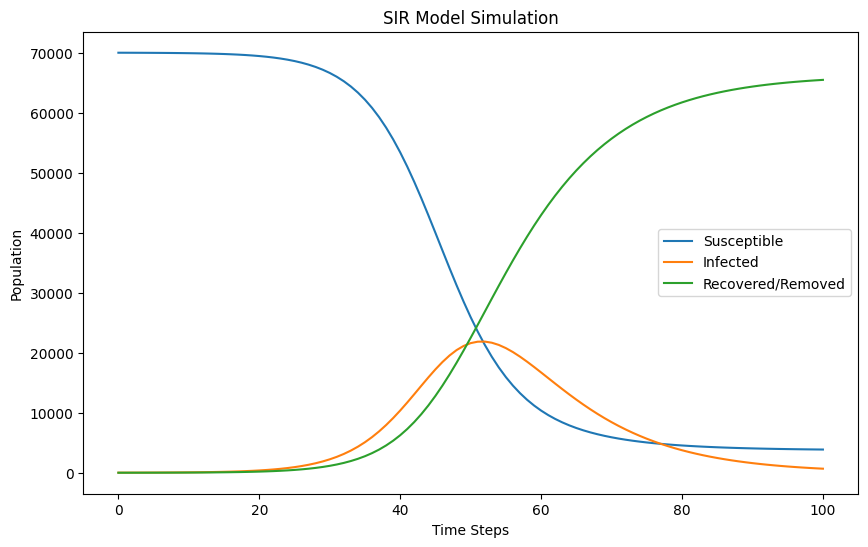

In [9]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(susceptible_list, label='Susceptible')
plt.plot(infected_list, label='Infected')
plt.plot(recovered_list, label='Recovered/Removed')
plt.xlabel('Time Steps')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()
